# PRACTICA GUIADA: Reducción de la dimensionalidad

## 1) Análisis de Componentes Principales (PCA)

PCA es una técnica de aprendizaje no supervisado que tiene como objetivo fundamental la reducción de dimensiones. 
Tiene una variedad de aplicaciones:
1. Reducción de la dimensionalidad
2. Visualización
3. Eliminar el ruido
4. Generar nuevos features en el dataset

In [1]:
# Importamos las librerías para visualizar y realizar análisis numérico

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### 1.1) Introducción a PCA

Vamos a generar algunos puntos en dos dimensiones para tratar de dar una intuición acerca del funcionamiento de PCA.

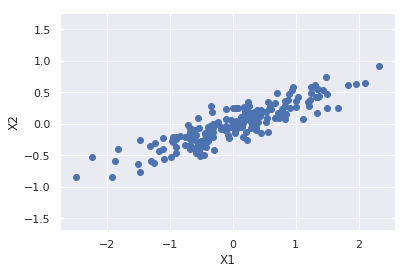

In [2]:
# Generamos los datos:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

# Ploteamos los datos:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.xlabel('X1')
plt.ylabel('X2');

Generamos dos variables con una relación lineal perturbada por errores que se distribuyen aleatoreamente con distribución normal (por default  𝜎=1  y  𝜇=0 ). ¿Hace falta estandarizar las variables en este caso?

In [3]:
# Calculamos la media de X
mean_X = X.mean(axis=0)
print("Media X: ")
print(mean_X)

print("\n")

# Calculamos la matriz de covarianzas de X
m_cov_X = np.dot((X - mean_X).T,(X - mean_X))/X.shape[0]
print("Matriz covarianzas: ")
print(m_cov_X)

Media X: 
[ 0.03351168 -0.00408072]


Matriz covarianzas: 
[[0.67876672 0.22978007]
 [0.22978007 0.09833763]]


Vemos que las variables de X no tienen 𝜇=0 y 𝜎=1, por lo tanto hay que normalizar. 

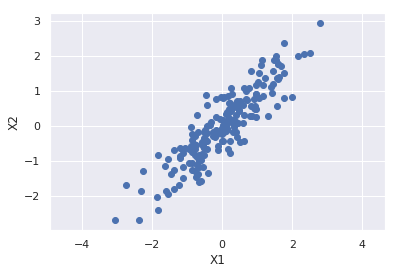

In [4]:
# En esta práctica vamos a usar la librería Scikit-learn (o sklearn). 
# Sklearn es una libería muy importante para la práctica de Data Science, ya que contiene
# diferentes algorítmos para problemas de aprendizaje supervisado y no supervisado, así
# como módulos dedicados a la limpieza de datos.

# Del módulo de preprocesamiento de Sklearn, vamos a importar a la clase StandardScaler
# para normalizar nuestros datos.

from sklearn.preprocessing import StandardScaler

# Instanciamos la clase, creando el objeto StdSclr.
StdSclr = StandardScaler()

# Con el método fit_transform() normalizamos los datos de la matriz X
X = StdSclr.fit_transform(X)

# Ploteamos nuevamente los datos:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.xlabel('X1')
plt.ylabel('X2');

In [5]:
# Calculamos nuevamente la media de X
mean_X = X.mean(axis=0)
print("Media X: ")
print(mean_X)

print("\n")

# Calculamos nuevamente la matriz de covarianzas de X
m_cov_X = np.dot((X - mean_X).T,(X - mean_X))/X.shape[0]
print("Matriz covarianzas: ")
print(m_cov_X)

Media X: 
[-1.77635684e-17 -4.44089210e-18]


Matriz covarianzas: 
[[1.         0.88938995]
 [0.88938995 1.        ]]


Vemos que ahora sí las variables tienen 𝜇=0 y 𝜎=1.

Ahora vamos a extaer los componentes principales.

In [6]:
# Importamos la clase PCA del modulo decomposition de la librería Sklearn.

from sklearn.decomposition import PCA

# Instanciamos la clase pidiendo que conserve 2 CP.
pca_2cp = PCA(n_components=2, svd_solver='full')

# Con el método fit() calculammos los componentes principales
pca_2cp.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

Vamos a imprimir a los Componentes Principales:

In [7]:
print(pca_2cp.components_)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Cada fila de esta matriz, representa un Componente Principal. Vemos que los componentes están expresados como combinaciones lineales de las variables originales. 

$$ cp1 = -0.70710678*x1 - 0.70710678*x2 $$
$$ cp2 = -0.70710678*x1 + 0.70710678*x2 $$

Los coeficientes se llaman *loadings*.

In [8]:
# Comprobamos la ortogonalidad de los componentes principales.

np.dot(pca_2cp.components_[0],pca_2cp.components_[1].T)

0.0

Veamos la varianza capturada por cada uno de los componentes (en absolutos):

In [9]:
print(pca_2cp.explained_variance_)

[1.89888438 0.11116588]


Es importante notar que, como normalizamos los datos con varianza de cada variable igual a 1, la suma total de las varianzas antes de aplicar PCA es igual al número de variables, en este caso D=2. Como al instanciar PCA pedimos conservar 2 componentes principales, es decir el total de variables, no redujimos la dimensionalidad del problema, simplemente lo expresamos en un sistema de coordenadas diferente. En este sistema, la primera variable acumula la mayor parte de la varianza, mientras que la segunda solamente acumula un residual. Sin embargo, la suma de ambas varianzas sigue siendo 2, ya en este caso no hubo pérdida de información al aplicar PCA.

Veamos la varianza capturada por cada uno de los componentes en términos relativos.

In [10]:
pca_2cp.explained_variance_ratio_

array([0.94469498, 0.05530502])

Ahora utilizamos PCA para reducir la cantidad de dimensiones de 2 a 1

In [11]:
# Instanciamos nuevamente la clase PCA, esta vez conservando solamente 1 componente principal.
pca_1cp = PCA(n_components=1, svd_solver='full')

# Con el método fit() calculammos el componente principal
pca_1cp.fit(X)

# Con el método transform() calculamos la proyección de nuestros datos sobre el cp1.
X_pca = pca_1cp.transform(X)

print("Forma original:   ", X.shape)
print("Forma transformada:", X_pca.shape)

Forma original:    (200, 2)
Forma transformada: (200, 1)


In [12]:
# Volvemos a hacer un print de los componentes principales. Vemos que ahora hay uno solo y 
# que es igual al cp1 del modelo anterior. 

print(pca_1cp.components_)

[[-0.70710678 -0.70710678]]


A su vez, usando `pca.inverse_transform(X)` logramos reproyectar los puntos sobre todo el espacio original (en este caso, reproyectamos los puntos sobre las dos dimensiones originales).

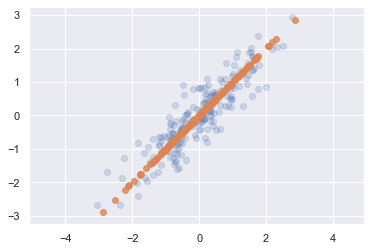

In [13]:
X_new = pca_1cp.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### 1.2) PCA para descubrir variables latentes

Vamos a ver ahora cómo podemos usar PCA para descubrir variables latentes y reducir la dimensionalidad del problema. 

Vamos ver un ejemplo presentado en el famoso libro de texto *An Introduction to Statistical Learning - with Applications in R* de Gareth James, Daniela Witten, Trevor Hastie y Robert Tibshirani.

En este ejemplo vamos a ver datos de arrestos en ciudades de USA.

In [14]:
# Creamos un DataFrame de Pandas importando el archivo csv USArrests.csv

df = pd.read_csv('../Data/USArrests.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [15]:
#Observamos los primeros 5 datos del DataFrame:

df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [16]:
# Observamos la media de las variables:
print("Media de las variables: ")
print(df.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de las variables: ")
print(df.var(axis=0))

Media de las variables: 
Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64


Varianza de las variables: 
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


In [17]:
# Normalizamos los datos utilizando el objeto StdSclr creado en la sección anterior:

df_std = pd.DataFrame(StdSclr.fit_transform(df), index=df.index, columns=df.columns)

In [18]:
# Observamos nuevamente la media de las variables:
print("Media de las variables: ")
print(df_std.mean(axis=0))

print('\n')

# Observamos nuevamente la varianza de las variables:
print("Varianza de las variables: ")
print(df_std.var(axis=0))

Media de las variables: 
Murder     -8.437695e-17
Assault     1.298961e-16
UrbanPop   -4.263256e-16
Rape        8.326673e-16
dtype: float64


Varianza de las variables: 
Murder      1.020408
Assault     1.020408
UrbanPop    1.020408
Rape        1.020408
dtype: float64


In [19]:
# Instanciamos la clase PCA:
pca_arrests = PCA()

# Al no especificar el número de componentes, PCA va a conservar todos los CP.

# Calculamos los componentes principales con el método fit()
pca_arrests.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
# Creamos un DataFRame con los loadings:

pca_loadings = pd.DataFrame(pca_arrests.components_.T, index=df.columns,\
                            columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [21]:
# Verificamos la ortonormalidad de los componentes principales:

pca_loadings.T.dot(pca_loadings)

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,1.040834e-16,-5.551115e-17,2.220446e-16
PC2,1.040834e-16,1.000000e+00,-5.551115e-17,8.326673e-17
PC3,-5.551115e-17,-5.551115e-17,1.000000e+00,3.330669e-16
PC4,2.220446e-16,8.326673e-17,3.330669e-16,1.000000e+00


Al observar los loadings, vemos que el PC1 está más relacionado con las variables 'Murder',
'Assault' y 'Rape', lo que podría representar el grado de criminalidad de cada Estado. Por otro lado, el peso de 'UrbanPop' es muy fuerte en el PC2, mientras que el peso de las demás variables es menor.

In [22]:
# Generamos un DataFrame expresando en términos de nuestros componentes principales:

df_pca = pd.DataFrame(pca_arrests.fit_transform(df_std), columns=['PC1', 'PC2', 'PC3', 'PC4'],\
                      index=df_std.index)
df_pca.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [23]:
# Observamos la media de las variables:
print("Media de los CP: ")
print(df_pca.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de los CPs: ")
print(df_pca.var(axis=0))

Media de los CP: 
PC1   -7.993606e-17
PC2    0.000000e+00
PC3   -3.497203e-17
PC4   -6.106227e-18
dtype: float64


Varianza de los CPs: 
PC1    2.530859
PC2    1.009964
PC3    0.363840
PC4    0.176969
dtype: float64


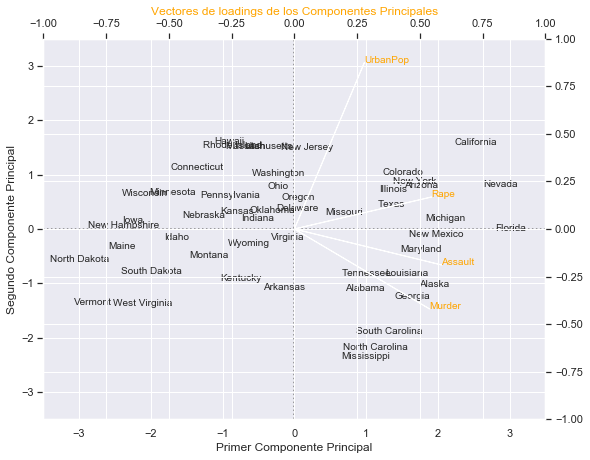

In [24]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Ploteamos a los Estados en el espacio de los Componentes Principales 1 y 2
for i in df_pca.index:
    ax1.annotate(i, (df_pca.PC1.loc[i], -df_pca.PC2.loc[i]), ha='center')

# Ploteamos las líneas de referencia
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Creamos ejes secundarios
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i], -pca_loadings.PC2.loc[i]), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1])
ax2.arrow(0,0,pca_loadings.PC1[2], -pca_loadings.PC2[2])
ax2.arrow(0,0,pca_loadings.PC1[3], -pca_loadings.PC2[3]);

De esta forma podemos ver gráficamente la relación entre las variables originales y los primeros 2 componentes principales.

In [25]:
# Vemos la varianza explicada de cada componente principal como atributo del modelo.

pca_arrests.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [26]:
# Vemos el ratio la varianza explicada de cada componente principal como atributo del modelo.

pca_arrests.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

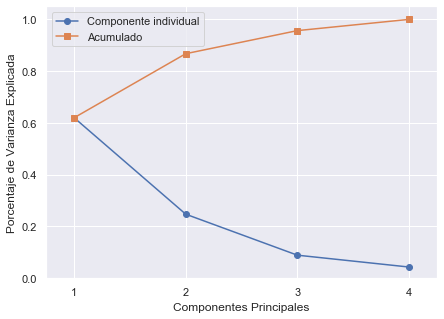

In [27]:
# Ploteamos como incrementa el % de varianza explicada a medida que agregamos componentes:

plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca_arrests.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot([1,2,3,4], np.cumsum(pca_arrests.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

### 1.3) PCA para reducir el ruido

PCA puede ser usado también como un "filtro de ruido". La intuición es la siguiente: cada componente con varianza mucho más grande que el ruido debería verse relativamente poco o nada afectado por dicho ruido. Entonces, si reconstruimos los datos usando solamente los componentes de mayor varianza, debería ser posible conservar la mayor parte de la señal y descartar la mayor parte del ruido.

In [28]:
# Sklearn tiene también un repositorio de datasets.
# Vamos a importar el dataset de dígitos

from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

El dataset de dígitos consiste en imagenes de 8x8 píxeles de dígitos del 0 al 9 escritos a mano.

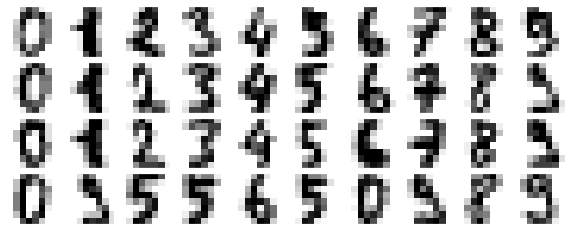

In [29]:
# Definimos una función para plotear los dígitos:

def plot_digits(data):

    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))


# ejecutamos la función con los datos de dígitos
plot_digits(digits.data)

Para probar esta funcionalidad de PCA, vamos a introducir ruido al dataset:

In [30]:
print(digits.data.mean())
print(digits.data.std())

4.884164579855314
6.016787548672236


`digits.data` tiene media 4.88 y desvío estándar de 6.02.

Para introducir ruido le sumamos errores aleatorios que se distribuyen normal con media 0 y desvío 4.

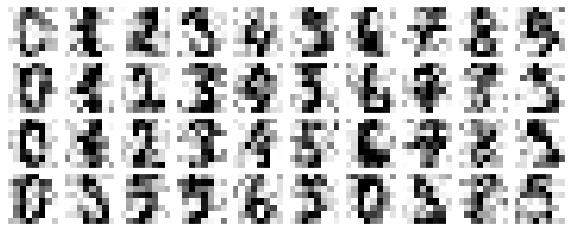

In [31]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Vamos a correr PCA para retener con la cantidad de componentes principales necesaria para explicar el 50% de la varianza.

In [32]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Primero calculamos los componentes para el dataset ruidoso.

In [33]:
components = pca.transform(noisy)
components.shape

(1797, 12)

 Luego aplicamoso la transformación inversa, que a partir de los componentes reconstruyó los valores de las x originales.
 
**¿CUÁNTOS COMPONENTES DESCARTAMOS AL EXPLICAR SÓLO EL 50% DE LA VARIANZA?**


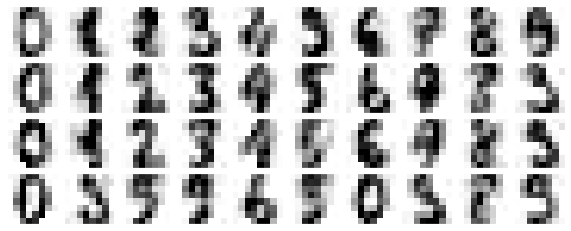

In [34]:
filtered = pca.inverse_transform(components)
plot_digits(filtered)

El dataset resultante es más difuso que el original pero el ruido no persiste.

### 1.4) PCA para visualizar los datos

Ahora vamos a usar PCA para visualizar el dataset de dígitos.

Hagamos, entonces, la proyección de 64 a 2 dimensiones a ver qué pasa...

In [35]:
pca = PCA(n_components=2, svd_solver='full')
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [36]:
# Definimos una función para plotear los dígitos en 2 dimensiones generados por PCA

def plot_digits_pca(projection, numbers):
    
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
    plt.figure(figsize=(10,10))
    plt.xlim(projection[:,0].min(), projection[:,0].max())
    plt.ylim(projection[:,1].min(), projection[:,1].max())

    for i in range(len(projection)):
        plt.text(projection[i,0], projection[i,1], str(numbers[i]),
                color=colors[numbers[i]], fontdict={'weight':'bold', 'size':9})
        plt.xlabel('Primer Componente Principal')
        plt.ylabel('Segundo Componente Principal')

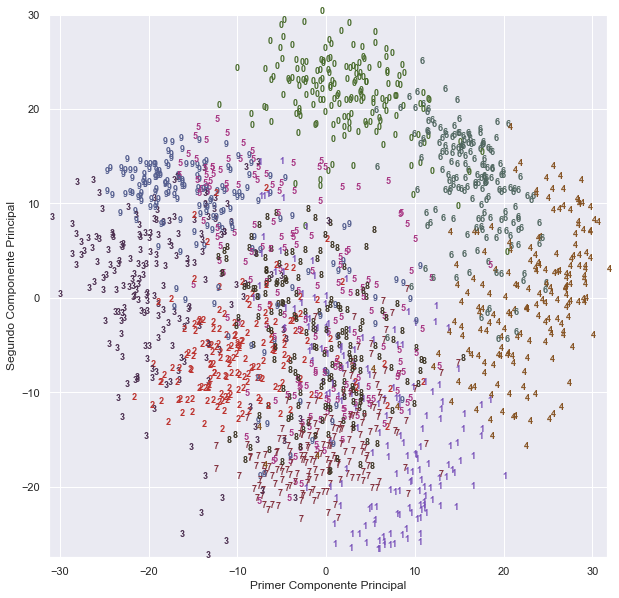

In [37]:
# Ploteamos los dígitos proyectados con PCA

plot_digits_pca(projected, digits.target)

Vemos que PCA logró encontrar alguna estructura en los datos pero no llegó a separar bien a la mayoría de los números. Por ejemplo, el segundo componente parece distinguir bien entre 0 y 1. 

Pero hay un punto importante. Estamos ploteando usando las etiquetas. Es decir que tenemos más información que la que vamos a tener en un problema típico de aprendizaje no supervisado en la realidad. 

Veamos cuál sería el resultado del ploteo sin las etiquetas:

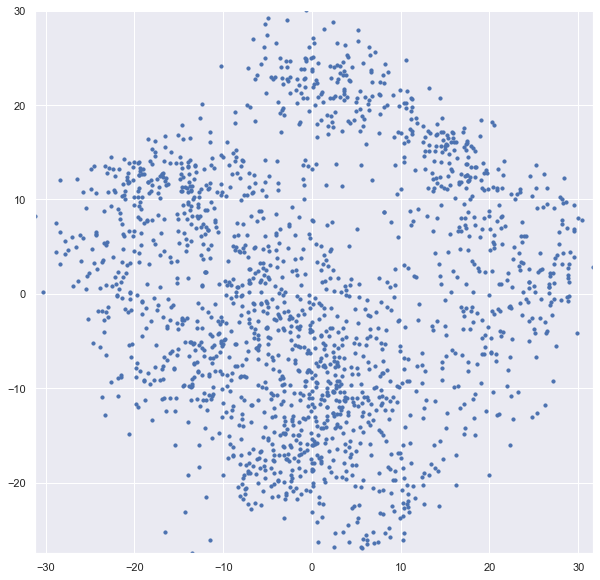

In [38]:
plt.figure(figsize=(10,10))
plt.xlim(projected[:,0].min(), projected[:,0].max())
plt.ylim(projected[:,1].min(), projected[:,1].max())

for i in range(len(projected)):
    plt.scatter(projected[i,0], projected[i,1], color='b', s=10)

Podemos intuir algún tipo de estructura pero evidentemente los datos son demasiado complejos y no lineales para que PCA pueda capturar correctamente la estructura.

Veamos qué resultados obtenemos aplicando las técnicas de Manifold Learning:

## 2) Técnicas de Manifold Learning para visualizar datos

In [39]:
# Definimos una función para plotear los dígitos en 2 dimensiones generados por Manifold

def plot_digits_manifold(projection, numbers):
    
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
    plt.figure(figsize=(10,10))
    plt.xlim(projection[:,0].min(), projection[:,0].max())
    plt.ylim(projection[:,1].min(), projection[:,1].max())

    for i in range(len(projection)):
        plt.text(projection[i,0], projection[i,1], str(numbers[i]),
                color=colors[numbers[i]], fontdict={'weight':'bold', 'size':9})
        plt.xlabel('Dimensión 1')
        plt.ylabel('Dimensión 2')

### 2.1) Isomap

In [40]:
# Importamos la clase Isomap de sklearn
from sklearn.manifold import Isomap

# Instanciamos y fiteamos el modelo
isomap = Isomap(n_neighbors=7, n_components=2, eigen_solver='dense')
digits_iso = isomap.fit_transform(digits.data)

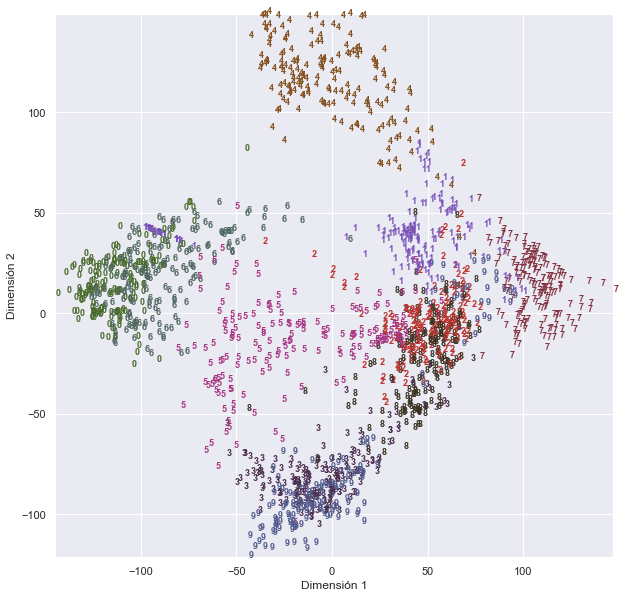

In [41]:
# Ploteamos los dígitos proyectados con Isomap

plot_digits_manifold(digits_iso, digits.target)

### 2.2) T-SNE

In [42]:
# Importamos la clase TSNE de sklearn
from sklearn.manifold import TSNE

# Instanciamos y fiteamos el modelo
tsne = TSNE(n_components=2, random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

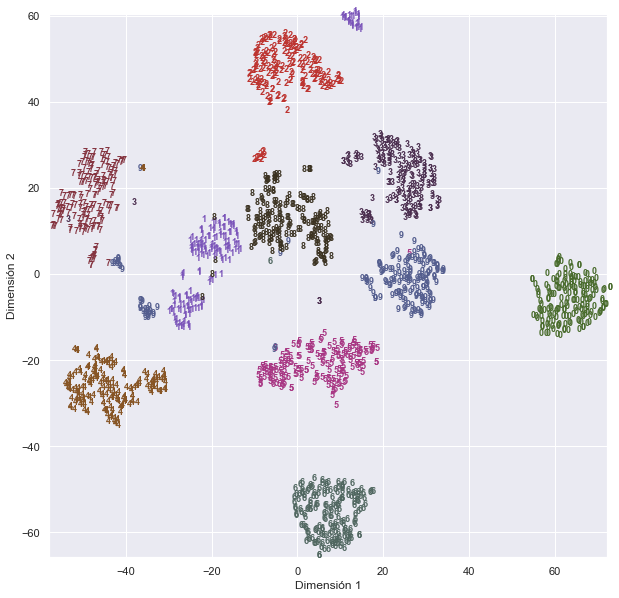

In [43]:
# Ploteamos los dígitos proyectados con T-SNE

plot_digits_manifold(digits_tsne, digits.target)

Vemos que T-SNE logra capturar mejor la estructura de los datos y separar mejor los diferentes dígitos al proyectar en 2 dimensiones.